<a href="https://colab.research.google.com/github/Hasnaa811/Challenge-Day-1/blob/main/DM_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=”Blue”> ***1.Introduction***</font>

L' infection rénale chronique (IRC) est une affection courante qui fait référence à une perte à long terme de la fonction rénale, affectant des millions de personnes dans le monde. Plus de deux millions de personnes dans le monde reçoivent une dialyse, une greffe de rein ou un autre type de traitement pour rester en vie, atteignant seulement 10% des cas. Un autre aspect est que seulement 20% de la population est traitée dans les pays en développement, soit seulement la moitié de la population mondiale .
L'IRC est une affection courante qui ne se manifeste pas immédiatement, entraînant l'absence de symptômes dans les premiers stades, étant dévaluée et ignorée par les personnes atteintes de cette maladie. La perte progressive de fonction, conduit à l'apparition de la pathologie à un stade très avancé . En tant qu'une maladie asymptomatique, ses complications ne sont pas facilement détectées et peuvent être confondues avec d'autres types de maladies. La plupart du temps, l'IRC est détectée lors d'une insuffisance rénale, ce qui entraîne des mesures extrêmes telles que la greffe rénale et, si elles n'en résultent pas, la mort. L'IRC ne peut être diagnostiquée à un stade précoce que par des néphrologues et des urologues expérimentés en utilisant les antécédents de la maladie, les symptômes et les tests de laboratoire. L'IRC comporte cinq stades de lésions rénales, allant de très légères lésions au stade 1 à une insuffisance rénale complète au stade 5, comme on peut le voir sur la figure  ci dessous ;

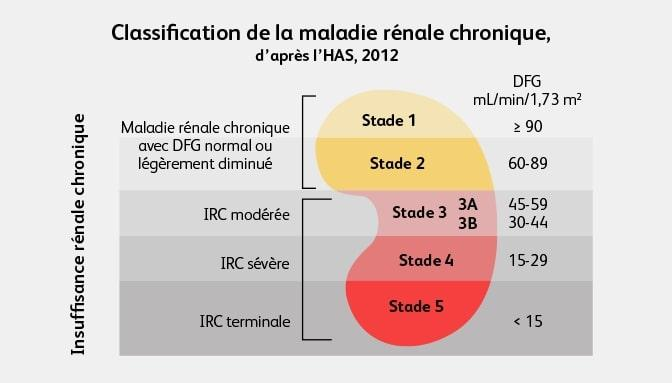

L'état des personnes qui nécessitent l'un des deux types de thérapie de remplacement rénal, la dialyse ou la greffe, est appelée maladie rénale en phase terminale . Afin d'empêcher les personnes atteintes de cette maladie d'atteindre la phase terminale, les techniques de prédiction de la maladie à un stade précoce deviennent un avantage et peuvent sauver des vies. Dans le domaine de la santé, la "Data Mining" DM a été largement utilisé pour prédire et classer les variables cliniques à l'aide des données stockées dans les systèmes d'information hospitaliers (HIS), qui peuvent être nettoyées et analysées à l'aide de techniques d'exploration de données . DM est généralement utilisé pour extraire des informations utiles à partir de données brutes. Les techniques de DM peuvent aider à découvrir des informations cachées pour une meilleure prise de décision, découvrir des modèles cachés et des relations inexploitées .

Ce projet vise à le cadre d'application des outils vus dans le cours de module de Data & Web Migning dans un domaine de la santé, et qu'on en a choisit l'IRC, se concentre sur les techniques de classification, en particulier dans le développement d'un classificateur capable de prédire un individu en tant que ckd (possesseur de la maladie) ou notckd (non possesseur de la maladie), en utilisant la méthodologie CRISP-DM et les algorithmes de la "Machine Learning" sur notebook jubyter.

#<font color=”Blue”> ***2. Methodologie : CRISP-DM***</font>

selon Europe smart vision CRISP-DM (cross-industry process for data mining)" est synonyme de processus intersectoriel pour l'exploration de données. La méthodologie CRISP-DM fournit une approche structurée pour planifier un projet d'exploration de données. C'est une méthodologie robuste et éprouvée. , sa flexibilité et son utilité lors de l'utilisation de l'analytique pour résoudre des problèmes commerciaux épineux. C'est le fil d'or qui traverse presque tous les engagements clients. Le modèle CRISP-DM est illustré à droite. Ce modèle est une séquence idéalisée d'événements. Dans la pratique, de nombreuses tâches peuvent être effectuées dans un ordre différent et il sera souvent nécessaire de revenir aux tâches précédentes et de répéter certaines actions. Le modèle n'essaie pas de capturer toutes les routes possibles à travers le processus d'exploration de données."

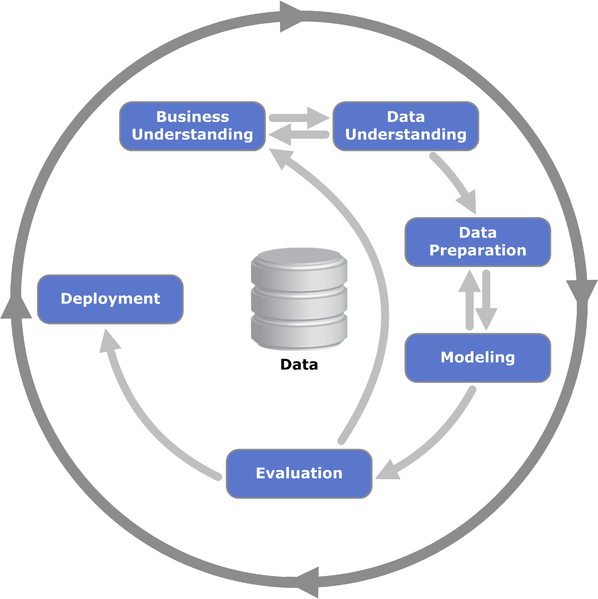

### **2.1** **Business Understanding**

La prédiction précoce et les traitements appropriés peuvent éventuellement arrêter ou ralentir la progression de l’IRC au stade terminal, où la dialyse ou la transplantation rénale sont le seul moyen de sauver la vie du patient. Il devient de plus en plus important d’utiliser ce type de prédictions car il est basé sur des informations de patients réels, permettant la création de modèles de prédiction qui aident les professionnels de santé dans leurs décisions. Dans ce contexte, cette ce projet vise à prédire les cas d'IRC à un stade précoce en se basant sur des données cliniques grâce à l'utilisation de techniques de DM.

### **2.2** **Data Understanding**

Dans ce projet, on a  utilisé une base de données liées à la détection de l'IRC, collectées dans un hôpital en Inde sur une période de 2 mois. cette dataset contient des informations sur 400 patients et 24 caractéristiques importantes pour identifier les facteurs de risque d'IRC et améliorer le diagnostic des cas de patients atteints d'IRC. L'ensemble de données contient des données personnelles, des données de tests de laboratoire sur le sang et l'urine et des données sur les antécédents cliniques du patient. Les attributs de l'ensemble de données sont présentés ci-aprés.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True )

Mounted at /content/drive


In [ ]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Renommer les colonnes pour avoir des noms significatifs
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

Notre variable cible "classification " indique "ckd" pour les cas qu'ont un IRC  et "notckd" pour les personnes qui n'ont pas d'IRC.

L'attribut cible a une distribution déséquilibrée avec 250 cas
correspondant à ckd et seulement 150 à notckd

### **2.3 Data Preparation**

une préparation et un netoyage des données est nécessaire avant de passer aux phases suivante. La première étape consistait à vérifier les incohérences dans les données, les valeurs en double, les valeurs aberrantes et les valeurs manquantes. Il a été constaté qu'il n'y avait pas de valeurs en double dans les données. Toutes les valeurs manquantes détectées ont été remplacées par le mode pour les attributs nominaux et par la moyenne pour les attributs numériques.

**- Netoyage de data**

Supprimer la colonne Id , et afficher les valeurs pour detecter les incoherences

In [ ]:
df.drop(["id"],axis=1,inplace=True)

In [ ]:
for i in df.columns:
    print("unique values in {}:".format(i),df[i].unique())

unique values in age: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in blood_pressure: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in specific_gravity: [1.02  1.01  1.005 1.015   nan 1.025]
unique values in albumin: [ 1.  4.  2.  3.  0. nan  5.]
unique values in sugar: [ 0.  3.  4.  1. nan  2.  5.]
unique values in red_blood_cells: [nan 'normal' 'abnormal']
unique values in pus_cell: ['normal' 'abnormal' nan]
unique values in pus_cell_clumps: ['notpresent' 'present' nan]
unique values in bacteria: ['notpresent' 'present' nan]
unique values in blood_glucose_random: [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264

***Supprimer les incoherences d'ecriture des valeurs sur les variables : ***

In [ ]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
df['classification'] = df['classification'].replace(to_replace='ckd\t',value='ckd')

**Corriger les types des variables red_blood_cell_count, packed_cell_volume et white_blood_cell_count qui figurent comme des objets pour les rendre de type numérique :**

In [ ]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [ ]:
for i in df.columns:
    print("unique values in {}:".format(i),df[i].unique())

unique values in age: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in blood_pressure: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in specific_gravity: [1.02  1.01  1.005 1.015   nan 1.025]
unique values in albumin: [ 1.  4.  2.  3.  0. nan  5.]
unique values in sugar: [ 0.  3.  4.  1. nan  2.  5.]
unique values in red_blood_cells: [nan 'normal' 'abnormal']
unique values in pus_cell: ['normal' 'abnormal' nan]
unique values in pus_cell_clumps: ['notpresent' 'present' nan]
unique values in bacteria: ['notpresent' 'present' nan]
unique values in blood_glucose_random: [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

***### Imputation des valeurs manquantes ***

Détecter les valeurs manquantes :

In [ ]:
df.isna().sum().sort_values()

classification               0
pedal_edema                  1
appetite                     1
anemia                       1
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
pus_cell_clumps              4
bacteria                     4
age                          9
blood_pressure              12
serum_creatinine            17
blood_urea                  19
blood_glucose_random        44
albumin                     46
specific_gravity            47
sugar                       49
haemoglobin                 52
pus_cell                    65
packed_cell_volume          71
sodium                      87
potassium                   88
white_blood_cell_count     106
red_blood_cell_count       131
red_blood_cells            152
dtype: int64

Visualiser les valeurs manquantes

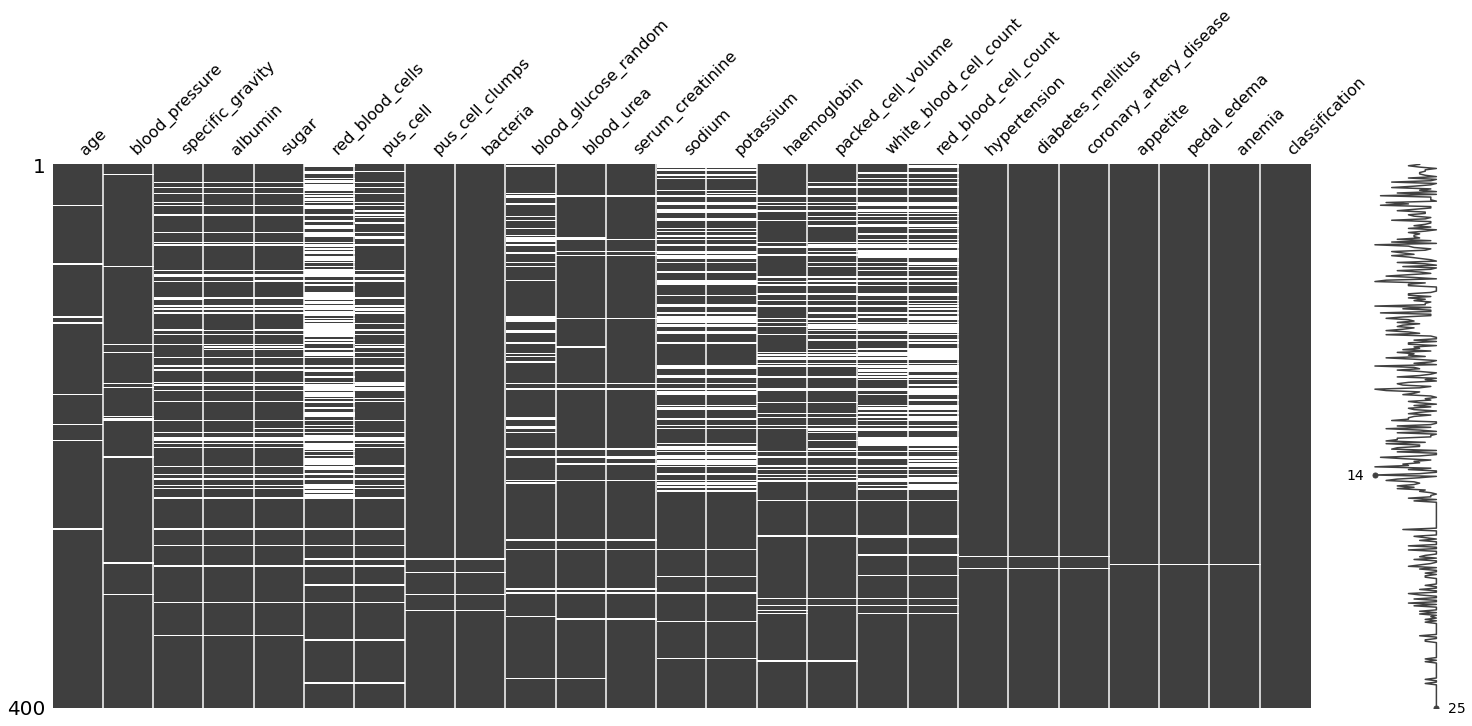

In [ ]:
import missingno as msno

msno.matrix(df)
plt.show()

### Pour les variables de type numérique : Remplacées  les valeurs manquantes par la moyenne  

In [ ]:
for i in ['age','blood_pressure','specific_gravity','albumin','sugar','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','red_blood_cell_count','white_blood_cell_count','packed_cell_volume']:
    df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

### Remplacées  les valeurs manquantes par le mode  les variables de types non numériques

Mettres ces variables en type numérique de format binaire {0:1}

In [ ]:
df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
df[['red_blood_cells','pus_cell']] = df[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
df[['pus_cell_clumps','bacteria']] = df[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
df[['appetite']] = df[['appetite']].replace(to_replace={'good':1,'poor':0})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0})

In [ ]:
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

### Detecter les valeurs abberantes et extrême

In [ ]:
def print_quantile_info(qu_dataset, qu_field):
    a = qu_dataset[qu_field].describe()

    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)

    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)

    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)

    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))

    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))

In [ ]:
print_quantile_info(df, "age")

interquartile range: 22.0
upper_inner_fence: 97.0
lower_inner_fence: 9.0
upper_outer_fence: 130.0
lower_outer_fence: -24.0
percentage of records out of inner fences: 2.50
percentage of records out of outer fences: 0.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for Customer Loyalty Before Removal')

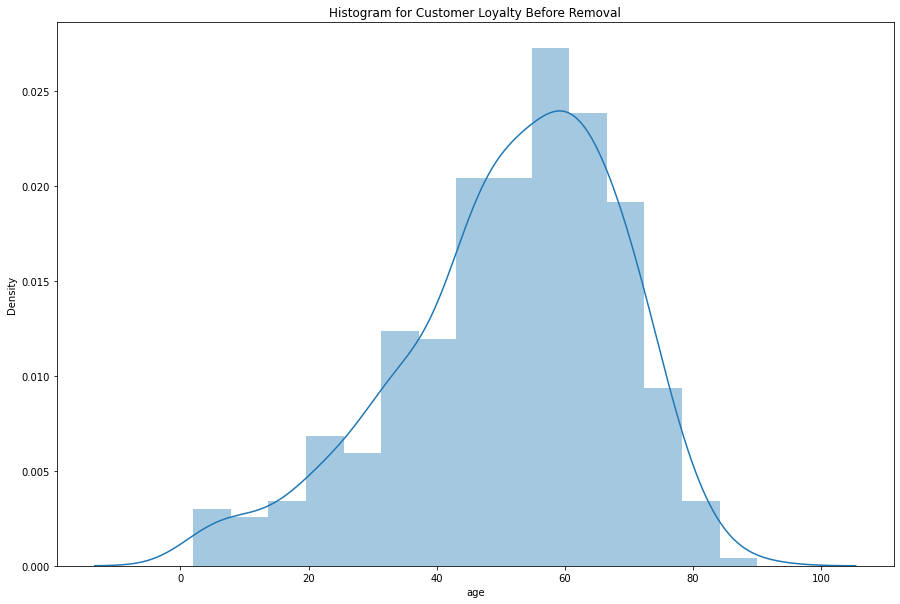

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df["age"]);
plt.title('Histogram for Customer Loyalty Before Removal')

In [ ]:
print_quantile_info(df, "blood_pressure")

interquartile range: 10.0
upper_inner_fence: 95.0
lower_inner_fence: 55.0
upper_outer_fence: 110.0
lower_outer_fence: 40.0
percentage of records out of inner fences: 9.00
percentage of records out of outer fences: 0.75


In [ ]:
print_quantile_info(df, "specific_gravity")

interquartile range: 0.0050000000000001155
upper_inner_fence: 1.0275000000000003
lower_inner_fence: 1.0074999999999998
upper_outer_fence: 1.0350000000000004
lower_outer_fence: 0.9999999999999996
percentage of records out of inner fences: 1.75
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "albumin")

interquartile range: 2.0
upper_inner_fence: 5.0
lower_inner_fence: -3.0
upper_outer_fence: 8.0
lower_outer_fence: -6.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "sugar")

interquartile range: 0.45014245014245013
upper_inner_fence: 1.1253561253561255
lower_inner_fence: -0.6752136752136753
upper_outer_fence: 1.8005698005698005
lower_outer_fence: -1.3504273504273505
percentage of records out of inner fences: 12.00
percentage of records out of outer fences: 12.00


In [ ]:
print_quantile_info(df, "red_blood_cells")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 11.75
percentage of records out of outer fences: 11.75


In [ ]:
print_quantile_info(df, "pus_cell")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 19.00
percentage of records out of outer fences: 19.00


In [ ]:
print_quantile_info(df, "pus_cell_clumps")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 10.50
percentage of records out of outer fences: 10.50


In [ ]:
print_quantile_info(df, "bacteria")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 5.50
percentage of records out of outer fences: 5.50


In [ ]:
print_quantile_info(df, "blood_glucose_random")

interquartile range: 49.0
upper_inner_fence: 223.5
lower_inner_fence: 27.5
upper_outer_fence: 297.0
lower_outer_fence: -46.0
percentage of records out of inner fences: 13.25
percentage of records out of outer fences: 5.50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for Customer Loyalty Before Removal')

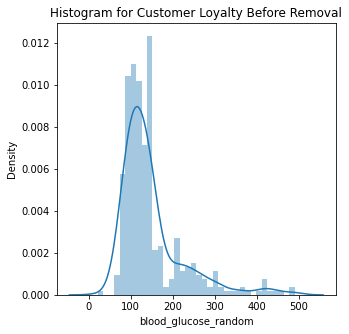

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df["blood_glucose_random"]);
plt.title('Histogram for Customer Loyalty Before Removal')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for Customer Loyalty After Removal')

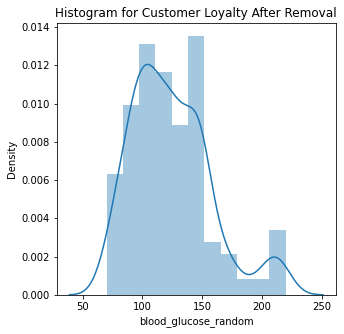

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(new_dataset["blood_glucose_random"])
plt.title('Histogram for Customer Loyalty After Removal')

In [ ]:
print_quantile_info(df, "blood_urea")

interquartile range: 34.75
upper_inner_fence: 113.875
lower_inner_fence: -25.125
upper_outer_fence: 166.0
lower_outer_fence: -77.25
percentage of records out of inner fences: 10.25
percentage of records out of outer fences: 3.75


In [ ]:
print_quantile_info(df, "serum_creatinine")

interquartile range: 2.1724543080939935
upper_inner_fence: 6.331135770234984
lower_inner_fence: -2.3586814621409906
upper_outer_fence: 9.589817232375974
lower_outer_fence: -5.617362924281981
percentage of records out of inner fences: 11.00
percentage of records out of outer fences: 6.50


In [ ]:
print_quantile_info(df, "sodium")

interquartile range: 6.0
upper_inner_fence: 150.0
lower_inner_fence: 126.0
upper_outer_fence: 159.0
lower_outer_fence: 117.0
percentage of records out of inner fences: 4.50
percentage of records out of outer fences: 2.25


In [ ]:
print_quantile_info(df, "potassium")

interquartile range: 0.7999999999999998
upper_inner_fence: 6.0
lower_inner_fence: 2.8000000000000003
upper_outer_fence: 7.199999999999999
lower_outer_fence: 1.6000000000000005
percentage of records out of inner fences: 3.50
percentage of records out of outer fences: 0.75


In [ ]:
print_quantile_info(df, "haemoglobin")

interquartile range: 3.75
upper_inner_fence: 20.25
lower_inner_fence: 5.25
upper_outer_fence: 25.875
lower_outer_fence: -0.375
percentage of records out of inner fences: 0.50
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "packed_cell_volume")

interquartile range: 10.0
upper_inner_fence: 59.0
lower_inner_fence: 19.0
upper_outer_fence: 74.0
lower_outer_fence: 4.0
percentage of records out of inner fences: 1.50
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "white_blood_cell_count")

interquartile range: 2425.0
upper_inner_fence: 13037.5
lower_inner_fence: 3337.5
upper_outer_fence: 16675.0
lower_outer_fence: -300.0
percentage of records out of inner fences: 4.25
percentage of records out of outer fences: 1.25


In [ ]:
print_quantile_info(df, "red_blood_cell_count")

interquartile range: 0.5999999999999996
upper_inner_fence: 5.999999999999999
lower_inner_fence: 3.6000000000000005
upper_outer_fence: 6.899999999999999
lower_outer_fence: 2.700000000000001
percentage of records out of inner fences: 18.75
percentage of records out of outer fences: 2.75


In [ ]:
print_quantile_info(df, "hypertension")

interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "diabetes_mellitus")

interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00


In [ ]:
print_quantile_info(df, "coronary_artery_disease")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 8.50
percentage of records out of outer fences: 8.50


In [ ]:
print_quantile_info(df, "appetite")

interquartile range: 0.0
upper_inner_fence: 1.0
lower_inner_fence: 1.0
upper_outer_fence: 1.0
lower_outer_fence: 1.0
percentage of records out of inner fences: 20.50
percentage of records out of outer fences: 20.50


In [ ]:
print_quantile_info(df, "pedal_edema")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 19.00
percentage of records out of outer fences: 19.00


In [ ]:
print_quantile_info(df, "anemia")

interquartile range: 0.0
upper_inner_fence: 0.0
lower_inner_fence: 0.0
upper_outer_fence: 0.0
lower_outer_fence: 0.0
percentage of records out of inner fences: 15.00
percentage of records out of outer fences: 15.00


In [ ]:
print_quantile_info(df, "classification")

interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00


In [ ]:
def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()

    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)

    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)

    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)

    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))

    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))

    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset

    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))

    return output_dataset

In [ ]:
df.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(df, "age", "inner")

interquartile range: 22.0
upper_inner_fence: 97.0
lower_inner_fence: 9.0
upper_outer_fence: 130.0
lower_outer_fence: -24.0
percentage of records out of inner fences: 2.50
percentage of records out of outer fences: 0.00
length of input dataframe: 400
length of new dataframe after outlier removal: 390


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for Customer Loyalty After Removal')

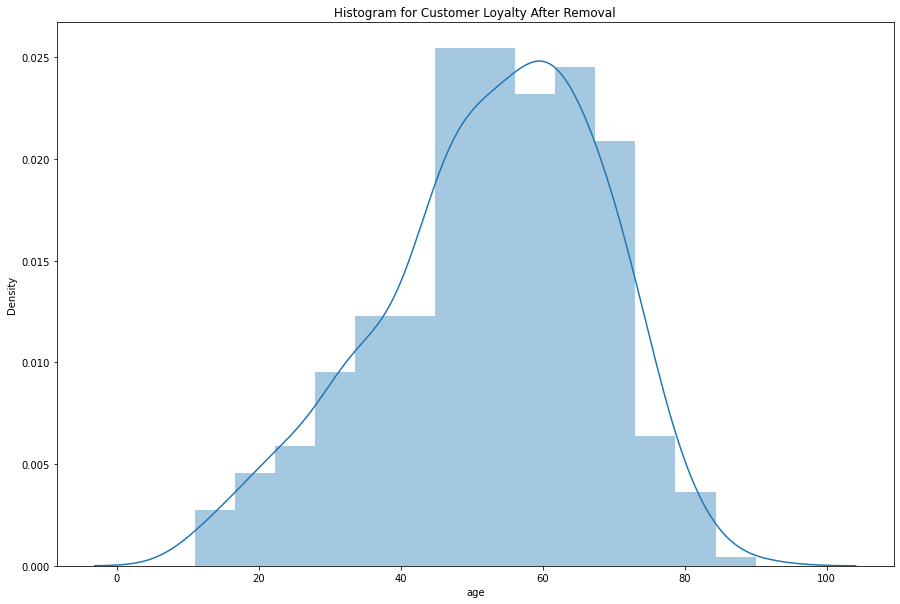

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(new_dataset["age"])
plt.title('Histogram for Customer Loyalty After Removal')

In [ ]:
df.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(new_dataset, "blood_glucose_random", "inner")

interquartile range: 51.0
upper_inner_fence: 229.5
lower_inner_fence: 25.5
upper_outer_fence: 306.0
lower_outer_fence: -51.0
percentage of records out of inner fences: 13.08
percentage of records out of outer fences: 4.87
length of input dataframe: 390
length of new dataframe after outlier removal: 339


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Histogram for Customer Loyalty After Removal')

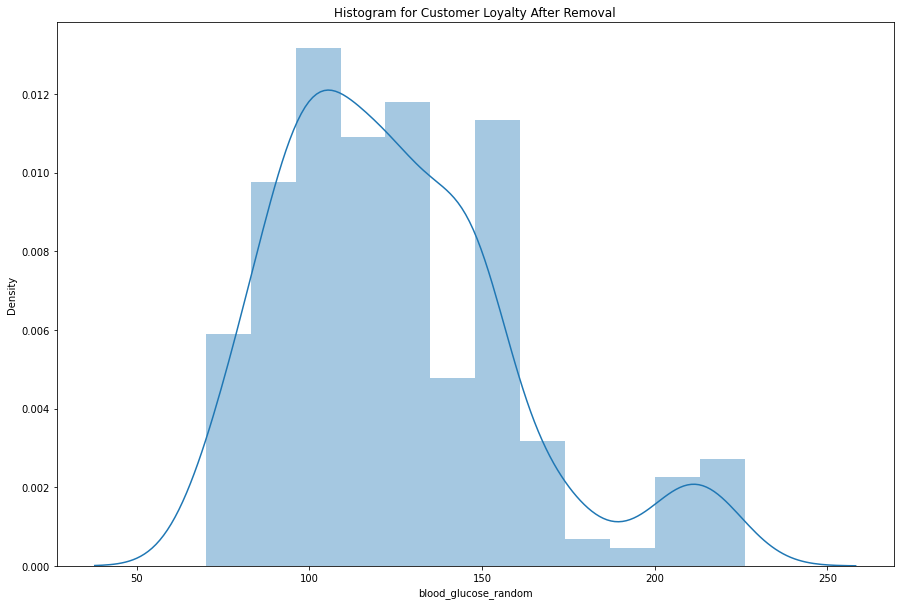

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(new_dataset["blood_glucose_random"])
plt.title('Histogram for Customer Loyalty After Removal')

In [ ]:
df.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(new_dataset, "red_blood_cell_count", "inner")

interquartile range: 0.5999999999999996
upper_inner_fence: 5.999999999999999
lower_inner_fence: 3.6000000000000005
upper_outer_fence: 6.899999999999999
lower_outer_fence: 2.700000000000001
percentage of records out of inner fences: 18.02
percentage of records out of outer fences: 2.03
length of input dataframe: 394
length of new dataframe after outlier removal: 323


In [ ]:
df.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(df, "packed_cell_volume", "inner")

interquartile range: 10.0
upper_inner_fence: 59.0
lower_inner_fence: 19.0
upper_outer_fence: 74.0
lower_outer_fence: 4.0
percentage of records out of inner fences: 1.50
percentage of records out of outer fences: 0.00
length of input dataframe: 400
length of new dataframe after outlier removal: 394


In [ ]:
df.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(new_dataset, "classification", "inner")

interquartile range: 1.0
upper_inner_fence: 2.5
lower_inner_fence: -1.5
upper_outer_fence: 4.0
lower_outer_fence: -3.0
percentage of records out of inner fences: 0.00
percentage of records out of outer fences: 0.00
length of input dataframe: 323
length of new dataframe after outlier removal: 323


### Chercher les correlation

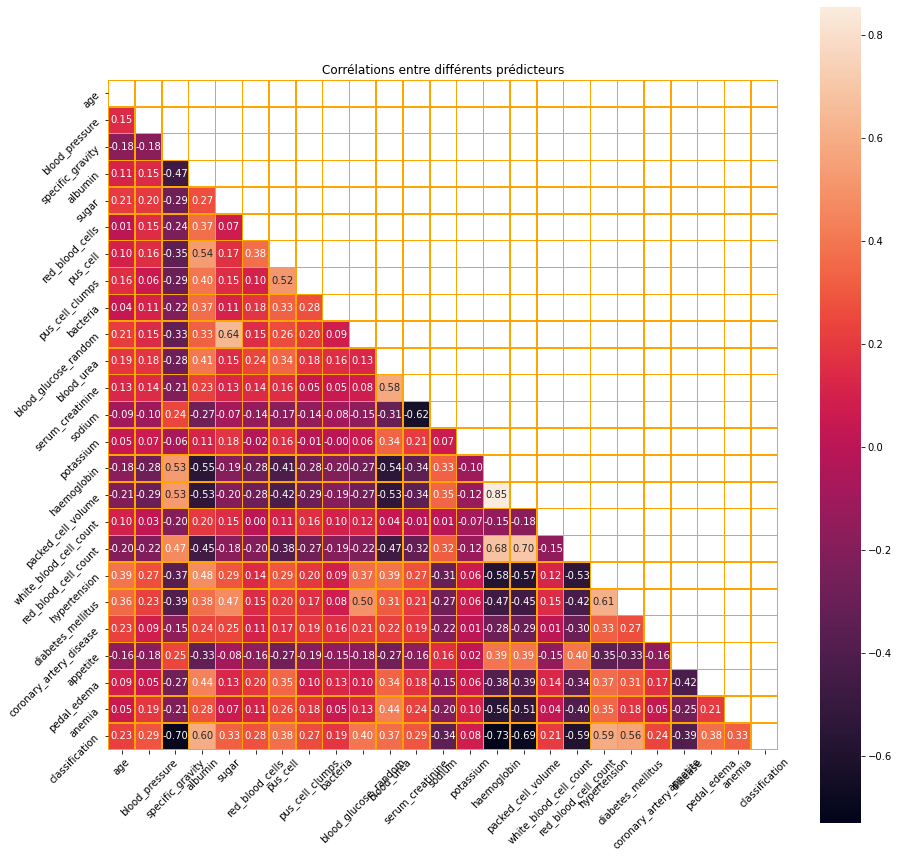

In [ ]:
corr_new_dataset = new_dataset.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Corrélations entre différents prédicteurs')
plt.show()

In [ ]:
df.drop(["haemoglobin"],axis=1,inplace=True)

In [ ]:
df.drop(["packed_cell_volume"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  white_blood_cell_count   4

### Normalisation

In [ ]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [ ]:
data_age = new_dataset['age']

In [ ]:
data_age

0      48.0
3      48.0
4      51.0
5      60.0
6      68.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 339, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Normalized data_age')

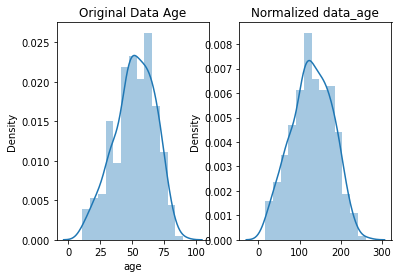

In [ ]:
# normalize the exponential data with boxcox
normalized_data_age = stats.boxcox(data_age)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(data_age, ax=ax[0])
ax[0].set_title("Original Data Age")
sns.distplot(normalized_data_age[0], ax=ax[1])
ax[1].set_title("Normalized data_age")

In [ ]:
data_packed_cell_volume = new_dataset['packed_cell_volume']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Normalized data_packed_cell_volume')

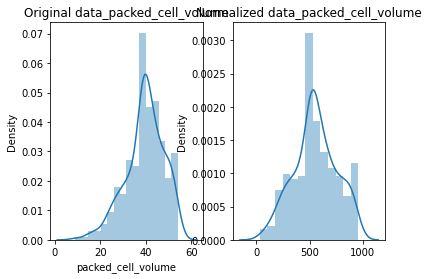

In [ ]:
# normalize the exponential data with boxcox
normalized_data_packed_cell_volume = stats.boxcox(data_packed_cell_volume)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(data_packed_cell_volume, ax=ax[0])
ax[0].set_title("Original data_packed_cell_volume")
sns.distplot(normalized_data_packed_cell_volume[0], ax=ax[1])
ax[1].set_title("Normalized data_packed_cell_volume")